In [38]:
import pandas as pd
import matplotlib.pyplot as plt

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [3]:
dados.shape

(127380, 136)

In [6]:
dados['SG_UF_RESIDENCIA'].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [73]:
dados.columns[60:100]

Index(['IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_CANHOTO', 'IN_CADEIRA_ACOLCHOADA',
       'IN_PROVA_DEITADO', 'IN_MOBILIARIO_OBESO', 'IN_LAMINA_OVERLAY',
       'IN_PROTETOR_AURICULAR', 'IN_MEDIDOR_GLICOSE', 'IN_MAQUINA_BRAILE',
       'IN_SOROBAN', 'IN_MARCA_PASSO', 'IN_SONDA', 'IN_MEDICAMENTOS',
       'IN_SALA_INDIVIDUAL', 'IN_SALA_ESPECIAL', 'IN_SALA_ACOMPANHANTE',
       'IN_MOBILIARIO_ESPECIFICO', 'IN_MATERIAL_ESPECIFICO', 'IN_NOME_SOCIAL',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA'],
      dtype='object')

In [8]:
len(dados['SG_UF_RESIDENCIA'].unique())

27

In [11]:
dados['SG_UF_RESIDENCIA'].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

In [12]:
dados['NU_IDADE'].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [13]:
dados['NU_IDADE'].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

Desafio 1: Proporção de inscritos por Idade:

In [28]:
proporcao_idade = dados['NU_IDADE'].value_counts().sort_index()/dados['NU_IDADE'].sum()*100
proporcao_idade.sort_index()

13    0.000142
14    0.005010
15    0.071383
16    0.278214
17    0.755264
        ...   
73    0.000071
75    0.000071
76    0.000036
77    0.000036
82    0.000036
Name: NU_IDADE, Length: 65, dtype: float64

In [30]:
proporcao_idade.sort_values(ascending=False)

18    0.762229
17    0.755264
19    0.512298
20    0.369993
16    0.278214
        ...   
73    0.000071
75    0.000071
77    0.000036
76    0.000036
82    0.000036
Name: NU_IDADE, Length: 65, dtype: float64

Fim desafio 1

Desafio 2: Descobrir de quais estados são os inscritos com 13 anos:

In [31]:
dados['SG_UF_RESIDENCIA'][dados['NU_IDADE']==13]

57359     SP
95630     MT
98197     AP
116501    BA
Name: SG_UF_RESIDENCIA, dtype: object

Fim desafio 2

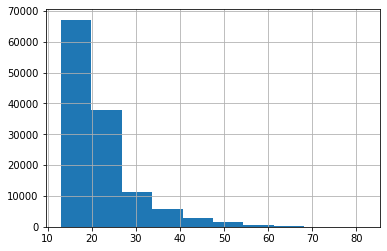

In [32]:
dados['NU_IDADE'].hist()

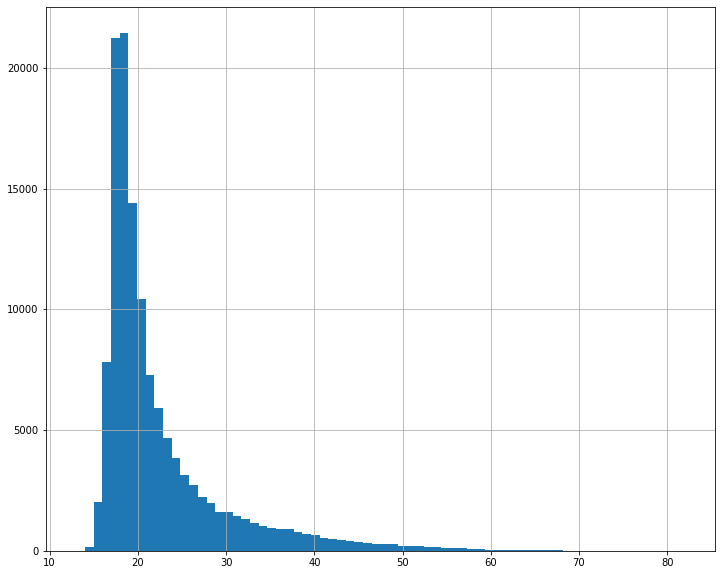

In [35]:
dados['NU_IDADE'].hist(bins=70, figsize=(12,10))

Desafio 3: Inserir titulo ao grafico:


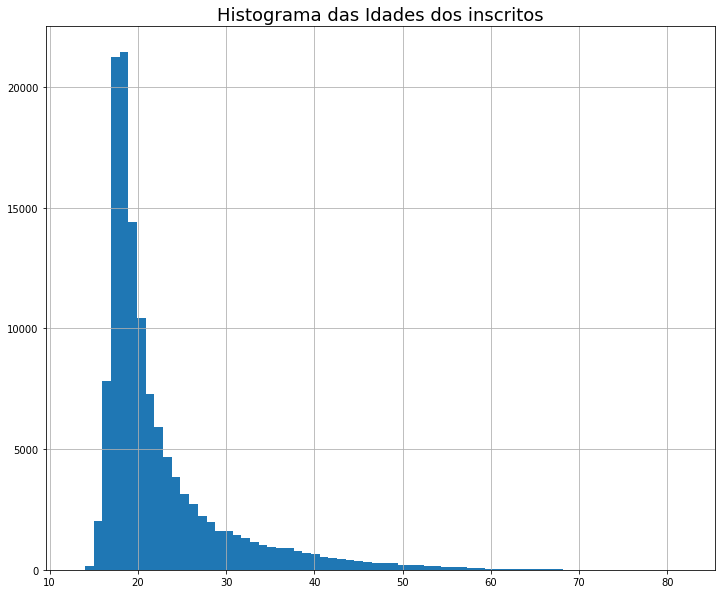

In [44]:
plt.figure(figsize=(12,10))
plt.title('Histograma das Idades dos inscritos', fontsize=18)
dados['NU_IDADE'].hist(bins=70)
plt.show()

Fim desafio 3

In [48]:
dados.query('IN_TREINEIRO == 1')['NU_IDADE'].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

Desafio 4: Plotar os Histogramas das idades dos treineiros e não treineiros

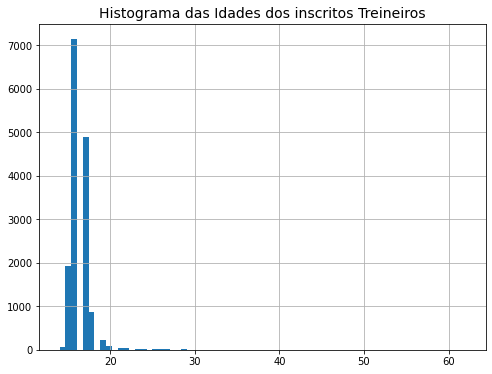

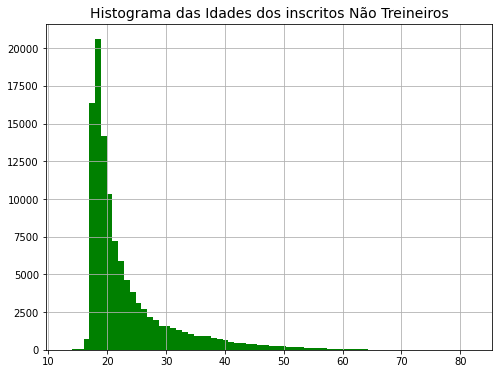

In [65]:
plt.figure(figsize=(8,6))
plt.title('Histograma das Idades dos inscritos Treineiros', fontsize=14)
dados.query('IN_TREINEIRO == 1')['NU_IDADE'].hist(bins=70)
plt.figure(figsize=(8,6))
dados.query('IN_TREINEIRO == 0')['NU_IDADE'].hist(bins=70, color='g')
plt.title('Histograma das Idades dos inscritos Não Treineiros', fontsize=14)
plt.show()

Fim desafio 4

In [50]:
dados['NU_NOTA_REDACAO'].mean()

571.5700253970197

In [52]:
dados['NU_NOTA_REDACAO'].describe()

count    98043.000000
mean       571.570025
std        188.076455
min          0.000000
25%        480.000000
50%        580.000000
75%        680.000000
max       1000.000000
Name: NU_NOTA_REDACAO, dtype: float64

In [53]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


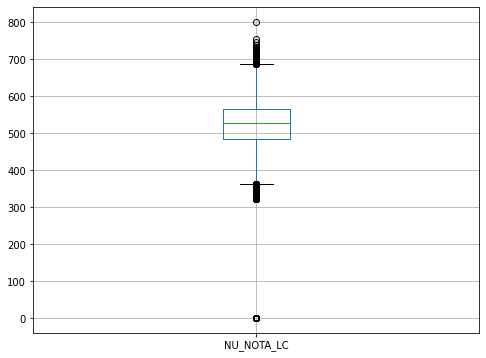

In [54]:
dados["NU_NOTA_LC"].plot.box(grid = True, figsize=(8,6))

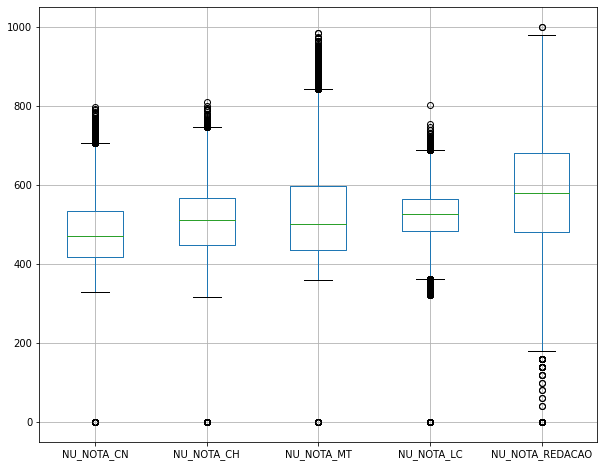

In [55]:
dados[provas].boxplot(grid=True, figsize= (10,8))

Desafio05: Comparar as distribuições das provas em inglês espanhol

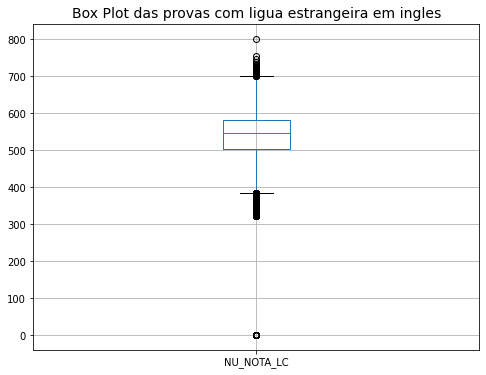

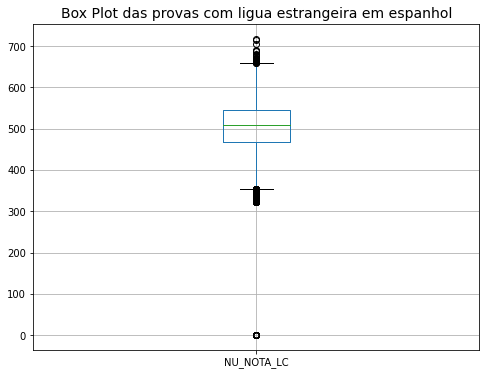

In [84]:
plt.figure()
dados['NU_NOTA_LC'][dados['TP_LINGUA']==0].plot.box(grid = True, figsize=(8,6))
plt.title('Box Plot das provas com ligua estrangeira em ingles', fontsize=14)

plt.figure()
dados['NU_NOTA_LC'][dados['TP_LINGUA']==1].plot.box(grid = True, figsize=(8,6))
plt.title('Box Plot das provas com ligua estrangeira em espanhol', fontsize=14)

plt.show()

Fim desafio 5

In [158]:
rendas = {'A':'Nenhuma renda','B':'Até R$ 998,00','C':'De R$ 998,01 até R$ 1.497,00','D':'De R$ 1.497,01 até R$ 1.996,00','E':'De R$ 1.996,01 até R$ 2.495,00','F':'De R$ 2.495,01 até R$ 2.994,00','G':'De R$ 2.994,01 até R$ 3.992,00.','H':'De R$ 3.992,01 até R$ 4.990,00','I':'De R$ 4.990,01 até R$ 5.988,00','J':'De R$ 5.988,01 até R$ 6.986,00','K':'De R$ 6.986,01 até R$ 7.984,00','L':'De R$ 7.984,01 até R$ 8.982,00','M':'De R$ 8.982,01 até R$ 9.980,00','N':'De R$ 9.980,01 até R$ 11.976,00','O':'De R$ 11.976,01 até R$ 14.970,00','P':'De R$ 14.970,01 até R$ 19.960,00','Q':'Mais de R$ 19.960,00'}
rendas_ticks =[]
for i in rendas:
  rendas_ticks.append(rendas[i])

medias_renda = pd.DataFrame.from_dict(rendas,orient ='index')

lista_media_renda = []
for i in medias_renda.index:
  lista_media_renda.append(round(dados['NU_NOTA_CN'][dados['Q006']==i].dropna().mean(),2))
medias_renda['Media ciencias da natureza'] = lista_media_renda

lista_media_renda = []
for i in medias_renda.index:
  lista_media_renda.append(round(dados['NU_NOTA_CH'][dados['Q006']==i].dropna().mean(),2))
medias_renda['Media ciencias humanas'] = lista_media_renda

lista_media_renda = []
for i in medias_renda.index:
  lista_media_renda.append(round(dados['NU_NOTA_LC'][dados['Q006']==i].dropna().mean(),2))
medias_renda['Media liguagens e codigos'] = lista_media_renda

lista_media_renda = []
for i in medias_renda.index:
  lista_media_renda.append(round(dados['NU_NOTA_MT'][dados['Q006']==i].dropna().mean(),2))
medias_renda['Media matematica'] = lista_media_renda

lista_media_renda = []
for i in medias_renda.index:
  lista_media_renda.append(round(dados['NU_NOTA_REDACAO'][dados['Q006']==i].dropna().mean(),2))
medias_renda['Media redacao'] = lista_media_renda

medias_renda['Media Geral'] = (medias_renda['Media redacao']+medias_renda['Media matematica']+medias_renda['Media liguagens e codigos']+medias_renda['Media ciencias humanas']+medias_renda['Media ciencias da natureza'])/5

medias_renda.rename(columns={0:'Renda'})

,Renda,Media ciencias da natureza,Media ciencias humanas,Media liguagens e codigos,Media matematica,Media redacao,Media Geral
A,Nenhuma renda,441.79,468.16,485.79,468.89,495.55,472.036
B,"Até R$ 998,00",444.91,473.25,492.48,476.00,514.88,480.304
C,"De R$ 998,01 até R$ 1.497,00",461.42,492.20,509.85,496.45,544.30,500.844
D,"De R$ 1.497,01 até R$ 1.996,00",476.66,508.51,522.93,521.88,565.42,519.080
E,"De R$ 1.996,01 até R$ 2.495,00",484.44,515.20,528.92,530.47,580.56,527.918
F,"De R$ 2.495,01 até R$ 2.994,00",496.46,529.21,539.26,553.90,606.57,545.080
G,"De R$ 2.994,01 até R$ 3.992,00.",502.85,534.42,542.63,559.79,620.69,552.076
H,"De R$ 3.992,01 até R$ 4.990,00",519.81,550.52,554.31,584.90,648.21,571.550
I,"De R$ 4.990,01 até R$ 5.988,00",524.58,554.60,555.79,593.58,660.34,577.778
J,"De R$ 5.988,01 até R$ 6.986,00",532.00,558.12,560.45,601.06,674.78,585.282


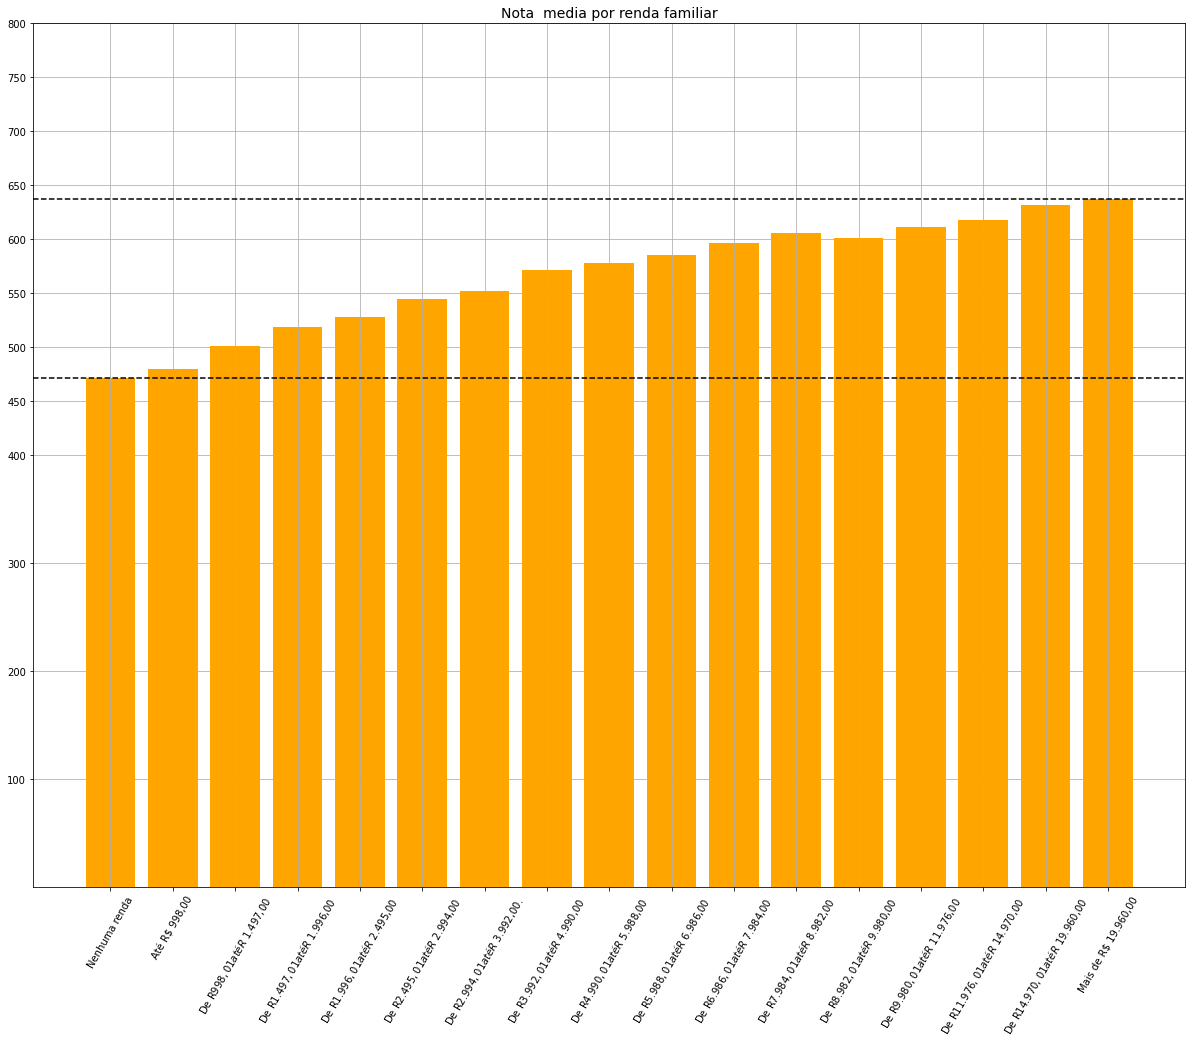

In [182]:
fig = plt.figure(figsize=(16,12))
axis = fig.add_axes([0,0,1,1])


plt.title('Nota  media por renda familiar', fontsize=14)
media_geral = medias_renda['Media Geral']
index=range(len(rendas_ticks))

axis.grid(True)
axis.bar(index,media_geral, color='orange')

axis.set_yticks([100,200,300,400,450,500,550,600,650,700,750,800])
axis.set_xticks(index)
axis.set_xticklabels(rendas_ticks)
plt.xticks(rotation=60)

axis.axhline(max(medias_renda['Media Geral']),color='k',linestyle='--')
axis.axhline(min(medias_renda['Media Geral']),color='k',linestyle='--')


plt.show()

In [165]:
media_geral

NameError: ignored